In [ ]:
pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [3]:
# Load datasets
#df_train = pd.read_csv('G:\ExcelR\Data Science Assignments\Assignment 15\XGBM & LGBM\\Titanic_train.csv')
#df_test = pd.read_csv('G:\ExcelR\Data Science Assignments\Assignment 15\XGBM & LGBM\\Titanic_test.csv')
df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')

df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [4]:
# EDA
# Check for missing values
missing_values = df_train.isnull().sum()
print("Missing Values:\n", missing_values)

df_train.fillna(method='ffill', inplace=True)

df_train.describe()

# Check for missing values
missing_values = df_test.isnull().sum()
print("Missing Values:\n", missing_values)

df_test.fillna(method='ffill', inplace=True)

df_test.describe()

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing Values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.125000,0.447368,0.392344,35.560845
std,120.810458,0.841838,13.905601,0.896760,0.981429,55.856972
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


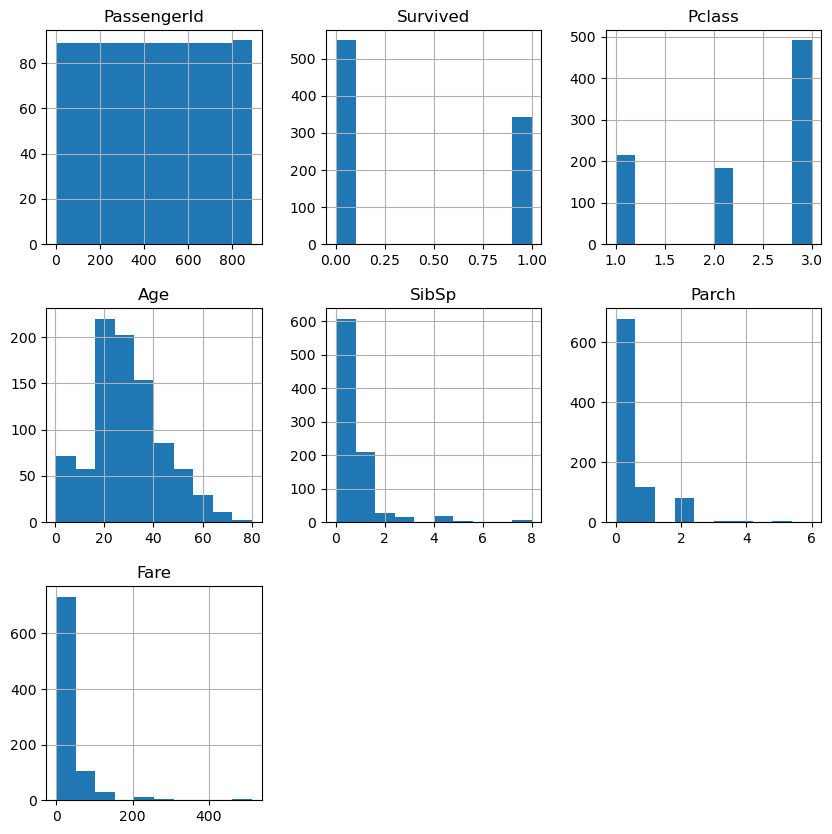

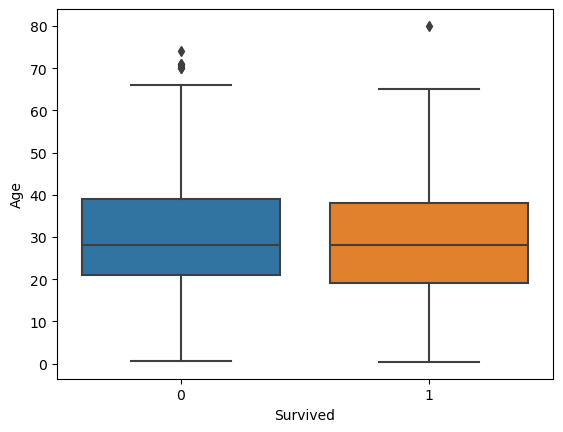

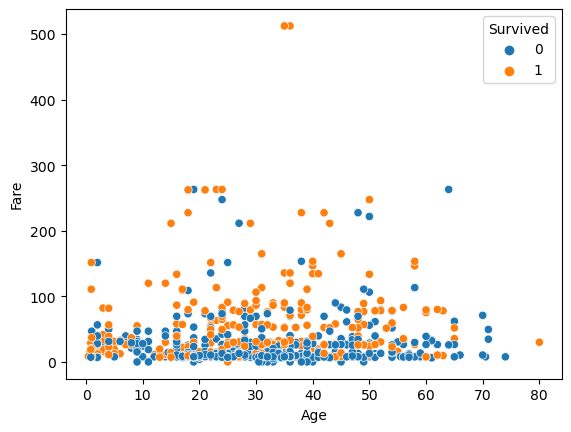

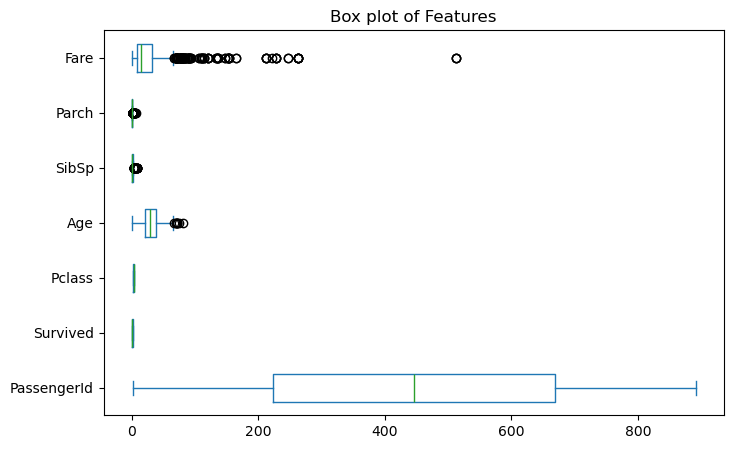

In [5]:
# Explore data distributions
# Histograms Training
df_train.hist(figsize=(10, 10))
plt.show()

# Box plots
sns.boxplot(x='Survived', y='Age', data=df_train)
plt.show()

# Visualize relationships between features and survival
# Scatter plots
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_train)
plt.show()

#Box Plot
df_train.plot(kind = 'box', vert=False, figsize=(8, 5)) #length,Height 
plt.title('Box plot of Features')
plt.show()

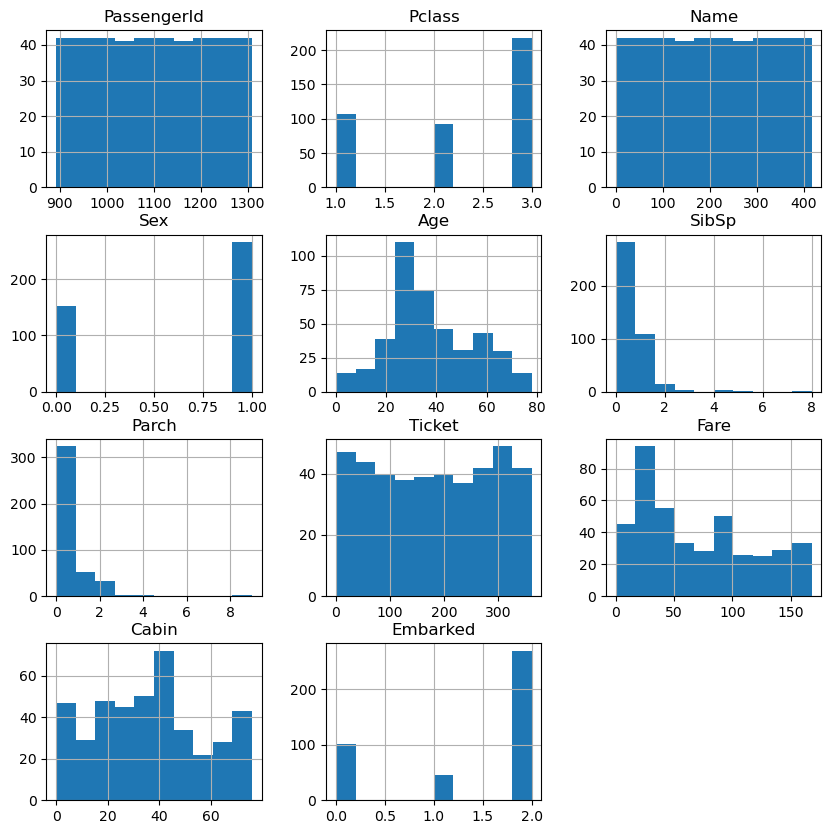

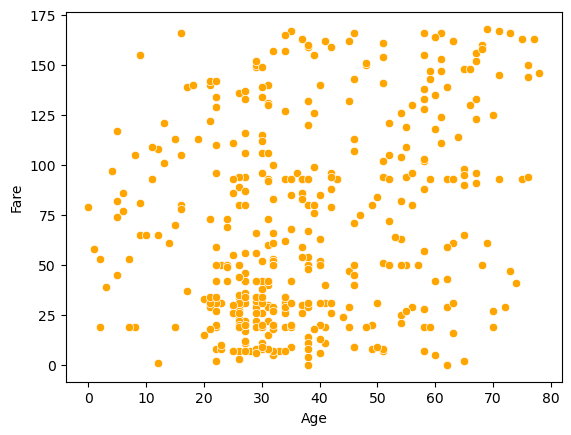

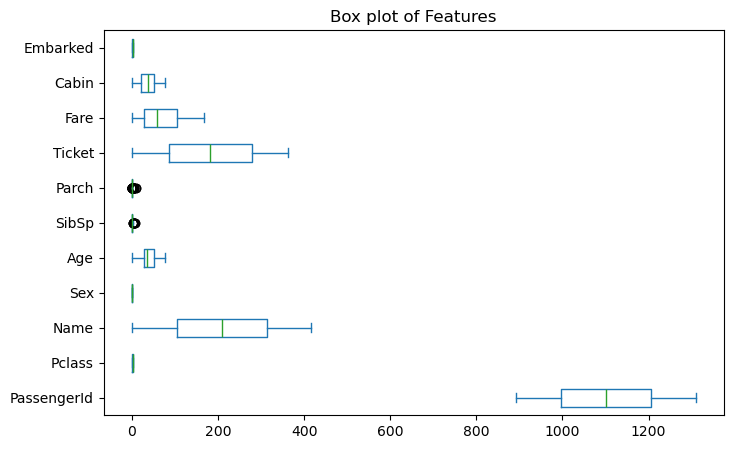

In [75]:
# Explore data distributions
# Histograms Test
df_test.hist(figsize=(10, 10))
plt.show()

# Visualize relationships between features and survival
# Scatter plots
sns.scatterplot(x='Age', y='Fare', data=df_test, color= 'orange')
plt.show()

#Box Plot
df_test.plot(kind = 'box', vert=False, figsize=(8, 5)) #length,Height 
plt.title('Box plot of Features')
plt.show()

In [6]:
#Label Encoding --> Training
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_train['Name'] = LE.fit_transform(df_train['Name'])
df_train['Sex'] = LE.fit_transform(df_train['Sex'])
df_train['Age'] = LE.fit_transform(df_train['Age'])
df_train['Ticket'] = LE.fit_transform(df_train['Ticket'])
df_train['Fare'] = LE.fit_transform(df_train['Fare'])
df_train['Cabin'] = LE.fit_transform(df_train['Cabin'])
df_train['Embarked'] = LE.fit_transform(df_train['Embarked'])

In [7]:
X_cont = df_train[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']]
X_cont.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,28,1,0,18
1,2,1,1,51,1,0,207
2,3,1,3,34,0,0,41
3,4,1,1,47,1,0,189
4,5,0,3,47,0,0,43


In [8]:
#Label Encoding --> Test
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_test['Name'] = LE.fit_transform(df_test['Name'])
df_test['Sex'] = LE.fit_transform(df_test['Sex'])
df_test['Age'] = LE.fit_transform(df_test['Age'])
df_test['Ticket'] = LE.fit_transform(df_test['Ticket'])
df_test['Fare'] = LE.fit_transform(df_test['Fare'])
df_test['Cabin'] = LE.fit_transform(df_test['Cabin'])
df_test['Embarked'] = LE.fit_transform(df_test['Embarked'])

In [9]:
X_cont = df_test[['PassengerId','Name','Pclass','Sex','Age','SibSp','Parch','Fare']]
X_cont.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,206,3,1,44,0,0,24
1,893,403,3,0,60,1,0,5
2,894,269,2,1,74,0,0,41
3,895,408,3,1,34,0,0,34
4,896,178,3,0,27,1,1,46


In [10]:
#Standarzation
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X_cont)
SS_X = pd.DataFrame(SS_X)
#d1 = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
d1 = ['PassengerId','Name','Pclass','Sex','Age','SibSp','Parch','Fare']
SS_X.columns = d1
SS_X.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.727912,-0.020718,0.873482,0.755929,0.363194,-0.499470,-0.400248,-0.945051
1,-1.719625,1.611889,0.873482,-1.322876,1.309083,0.616992,-0.400248,-1.335074
2,-1.711337,0.501385,-0.315819,0.755929,2.136735,-0.499470,-0.400248,-0.596084
3,-1.703050,1.653326,0.873482,0.755929,-0.227986,-0.499470,-0.400248,-0.739776
4,-1.694763,-0.252764,0.873482,-1.322876,-0.641813,0.616992,0.619896,-0.493446


In [11]:
Y = df['Survived']
X = df.drop('Survived', axis=1)
X.head()

NameError: name 'df' is not defined

In [ ]:
Y_col = "Survived"
X_train = df_train.drop(columns=[Y_col])
Y_train = df_train[Y_col]
X_test = df_train.drop(columns=[Y_col])
Y_test = df_train[Y_col]

In [ ]:
df = pd.concat([df_train, df_test], axis=0)
df.head()

In [12]:
# Building Predictive Models
# Split dataset into training and testing sets
X = df_train.drop('Survived', axis=1)
Y_col = df_train['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_col, test_size=0.2, random_state=42)

# Choose evaluation metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-Score': f1_score
}

# Build and evaluate LightGBM and XGBoost models
models = {
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Evaluation:")
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(Y_test, y_pred)
        print(f"{metric_name}: {metric_value:.4f}")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1011
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in